<a href="https://colab.research.google.com/github/MaryJane-Ifunanya/Marketing-Campaign-Analysis/blob/main/marketing_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing the dataset
data = pd.read_excel("/content/marketing_campaign_dataset.xlsx")


In [ ]:
data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01 00:00:00,506,1922,6,Health & Wellness
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01 00:00:00,116,7523,7,Fashionistas
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01 00:00:00,584,7698,1,Outdoor Adventurers
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01 00:00:00,217,1820,7,Health & Wellness
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01 00:00:00,379,4201,3,Health & Wellness


In [ ]:
data.shape

(200005, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200005 entries, 0 to 200004
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200005 non-null  int64  
 1   Company           200005 non-null  object 
 2   Campaign_Type     200005 non-null  object 
 3   Target_Audience   200005 non-null  object 
 4   Duration          200005 non-null  object 
 5   Channel_Used      200005 non-null  object 
 6   Conversion_Rate   200005 non-null  float64
 7   Acquisition_Cost  200005 non-null  int64  
 8   ROI               200005 non-null  float64
 9   Location          200005 non-null  object 
 10  Date              200005 non-null  object 
 11  Clicks            200005 non-null  int64  
 12  Impressions       200005 non-null  int64  
 13  Engagement_Score  200005 non-null  int64  
 14  Customer_Segment  200005 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 22.9+ MB


In [ ]:
#statistic summary
data.describe()

,Campaign_ID,Conversion_Rate,Acquisition_Cost,ROI,Clicks,Impressions,Engagement_Score
count,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000,200005.000000
mean,100003.000000,0.080069,12504.441794,5.002416,549.774591,5507.307107,5.494673
std,57736.614632,0.040602,4337.663210,1.734485,260.019354,2596.863794,2.872593
min,1.000000,0.010000,5000.000000,2.000000,100.000000,1000.000000,1.000000
25%,50002.000000,0.050000,8740.000000,3.500000,325.000000,3266.000000,3.000000
50%,100003.000000,0.080000,12497.000000,5.010000,550.000000,5518.000000,5.000000
75%,150004.000000,0.120000,16264.000000,6.510000,775.000000,7753.000000,8.000000
max,200005.000000,0.150000,20000.000000,8.000000,1000.000000,10000.000000,10.000000


In [ ]:
#Checking for missing values
data.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [ ]:
#checking for duplicates
data.duplicated().sum()

np.int64(0)

In [ ]:
#changing the 'Date' type
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)
data.dtypes

,0
Campaign_ID,int64
Company,object
Campaign_Type,object
Target_Audience,object
Duration,object
Channel_Used,object
Conversion_Rate,float64
Acquisition_Cost,int64
ROI,float64
Location,object


In [ ]:
#Unique values in Target Audience column
unique_target_aud = data['Target_Audience'].unique()
unique_target_aud

array(['Men 18-24', 'Women 35-44', 'Men 25-34', 'All Ages', 'Women 25-34'],
      dtype=object)

In [ ]:
#unique channels used
marketing_channels = data['Channel_Used'].unique()
marketing_channels

array(['Google Ads', 'YouTube', 'Instagram', 'Website', 'Facebook',
       'Email'], dtype=object)

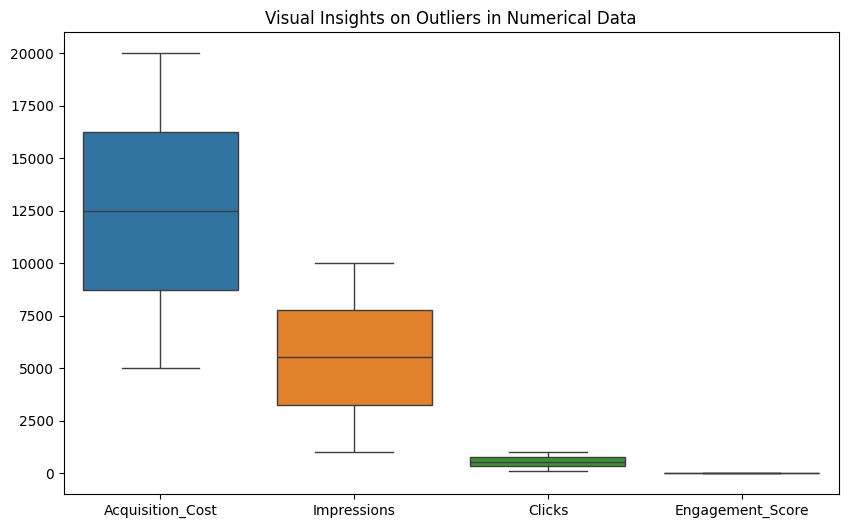

In [ ]:
#looking for outliers
n_columns = ['Acquisition_Cost','Impressions','Clicks', 'Engagement_Score']
plt.figure(figsize=(10,6))

#creating boxplot
sns.boxplot(data=data[n_columns])
plt.title("Visual Insights on Outliers in Numerical Data")
plt.show()

In [ ]:
# creating CTR and CPC column for each campaign
data['CTR'] = data['Clicks'] / data['Impressions'] * 100
data['CPC'] = data['Acquisition_Cost'] / data['Clicks']


In [ ]:
data.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Date,Clicks,Impressions,Engagement_Score,Customer_Segment,CTR,CPC
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174,6.29,Chicago,2021-01-01,506,1922,6,Health & Wellness,26.326743,31.964427
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566,5.61,New York,2021-02-01,116,7523,7,Fashionistas,1.541938,99.706897
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200,7.18,Los Angeles,2021-03-01,584,7698,1,Outdoor Adventurers,7.586386,17.465753
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724,5.55,Miami,2021-04-01,217,1820,7,Health & Wellness,11.923077,58.635945
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452,6.50,Los Angeles,2021-05-01,379,4201,3,Health & Wellness,9.021662,43.408971


In [ ]:
#Calculating the average CTR, CPC, and Conversion Rate for each channel
data.groupby('Channel_Used')[['CTR', 'CPC', 'Conversion_Rate', 'ROI']].mean()

,CTR,CPC,Conversion_Rate,ROI
Channel_Used,,,,
Email,14.054269,31.881471,0.080282,4.996487
Facebook,14.049724,32.129366,0.079990,5.018672
Google Ads,13.918943,32.308459,0.080181,5.003126
Instagram,14.003691,32.080786,0.079886,4.988706
Website,14.096941,31.779148,0.080182,5.014114
YouTube,14.119755,31.872904,0.079890,4.993720


In [ ]:
#Calculating the average CTR, CPC, and Conversion Rate for each Location
data.groupby(['Location'])[['CTR', 'CPC', 'Conversion_Rate', 'ROI']].mean()

,CTR,CPC,Conversion_Rate,ROI
Location,,,,
Chicago,14.045011,32.055853,0.080131,5.001555
Houston,14.059033,31.829355,0.079949,5.007174
Los Angeles,14.067175,32.078189,0.080013,5.010876
Miami,14.024957,32.152425,0.080047,5.012282
New York,14.006619,31.923819,0.080203,4.980185


In [ ]:
#Calculating the average CTR, CPC, and Conversion Rate for each Campaign_Type
data.groupby(['Campaign_Type'])[['CTR', 'CPC', 'Conversion_Rate', 'ROI']].mean()

,CTR,CPC,Conversion_Rate,ROI
Campaign_Type,,,,
Display,14.126483,31.923411,0.080088,5.006497
Email,13.948757,32.039734,0.079787,4.994274
Influencer,14.030083,32.102645,0.080315,5.011040
Search,13.993587,31.960865,0.080021,5.008357
Social Media,14.103856,32.014830,0.080132,4.991781


In [ ]:
company_agg = data.groupby(['Company'])[['CTR', 'CPC', 'Conversion_Rate', 'ROI']].mean()

In [ ]:
# Grouping by Campaign_Type and calculating sum (for Clicks, Impressions) and mean (for Conversion_Rate, ROI, CPC)
aggregated_data = data.groupby('Campaign_Type').agg({
    'Clicks': 'sum',
    'Impressions': 'sum',
    'Conversion_Rate': 'mean',
    'CPC': 'mean',
    'ROI': 'mean',
    'CTR': 'mean'
}).reset_index()

# Display the aggregated data
print(aggregated_data)

  Campaign_Type    Clicks  Impressions  Conversion_Rate        CPC       ROI  \
0       Display  22031837    220080744         0.080088  31.923411  5.006497   
1         Email  21898130    220147995         0.079787  32.039734  4.994274   
2    Influencer  22038185    220771844         0.080315  32.102645  5.011040   
3        Search  22032144    221415139         0.080021  31.960865  5.008357   
4  Social Media  21957371    219073236         0.080132  32.014830  4.991781   

         CTR  
0  14.126483  
1  13.948757  
2  14.030083  
3  13.993587  
4  14.103856  


<ipython-input-23-3a02cee400f4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Campaign_Type', y='ROI', data=aggregated_data, palette='viridis')


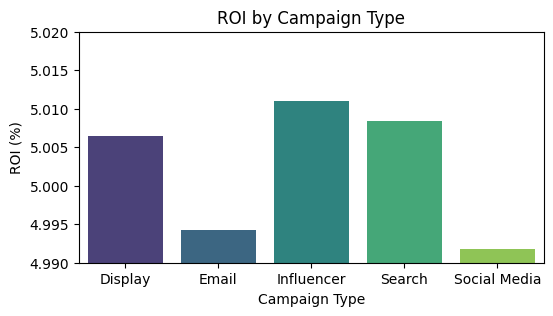

In [ ]:
# Plot for ROI
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign_Type', y='ROI', data=aggregated_data, palette='viridis')
plt.ylim(4.99,5.02)
plt.title('ROI by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('ROI (%)')
plt.show()

<ipython-input-24-647de775a75a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Campaign_Type', y='CTR', data=aggregated_data, palette='Set2')


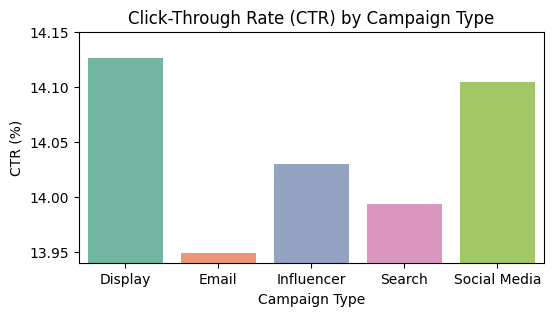

In [ ]:
# Plot for CTR
#Setting the figure size for clarity
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign_Type', y='CTR', data=aggregated_data, palette='Set2')
plt.ylim(13.94,14.15)
plt.title('Click-Through Rate (CTR) by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('CTR (%)')
plt.show()

<ipython-input-25-497b589fa846>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Campaign_Type', y='CPC', data=aggregated_data, palette='Set1')


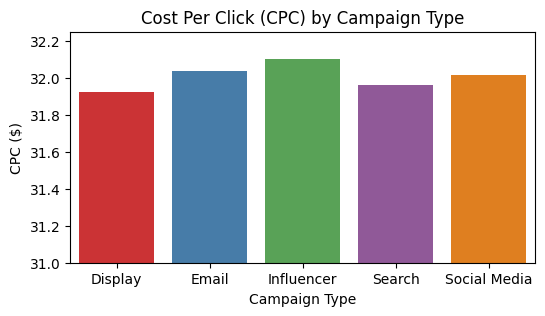

In [ ]:
# Plot for CPC
plt.figure(figsize=(6, 3))
sns.barplot(x='Campaign_Type', y='CPC', data=aggregated_data, palette='Set1')
plt.ylim(31.00,32.25)
plt.title('Cost Per Click (CPC) by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('CPC ($)')
plt.show()

<ipython-input-26-59cde59937bc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Campaign_Type', y='Clicks', data=aggregated_data, palette='Set1')


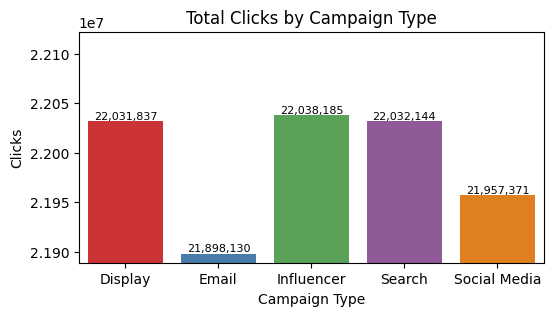

In [ ]:
# Plot for Clicks
plt.figure(figsize=(6, 3))
ax = sns.barplot(x='Campaign_Type', y='Clicks', data=aggregated_data, palette='Set1')

# Adding values on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Formats number with commas
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')  # Reduced font size to 8

#y-limit for better visibility
plt.ylim(21888888, 22122222)

# Customize labels and title
plt.title('Total Clicks by Campaign Type')
plt.xlabel('Campaign Type')
plt.ylabel('Clicks')

plt.show()



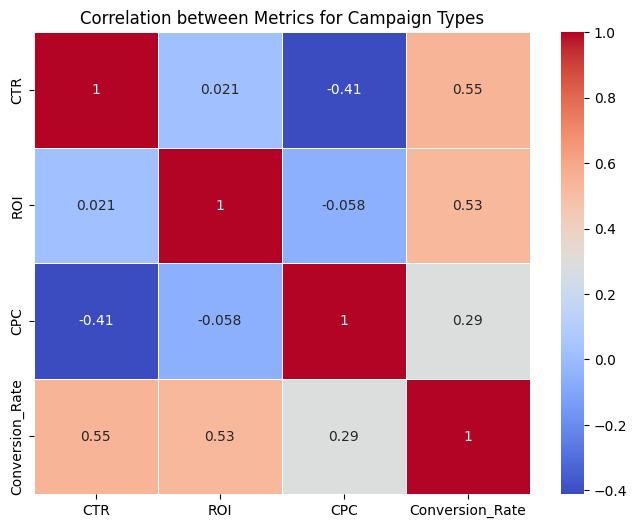

In [ ]:
# Correlation heatmap for the aggregated metrics
corr_matrix = aggregated_data[['CTR', 'ROI', 'CPC', 'Conversion_Rate']].corr()

# Ploting heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation between Metrics for Campaign Types')
plt.show()

Generating Insights

<ipython-input-28-0c82622b4377>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ROI', y='Company', data=company_agg, palette='Set2')


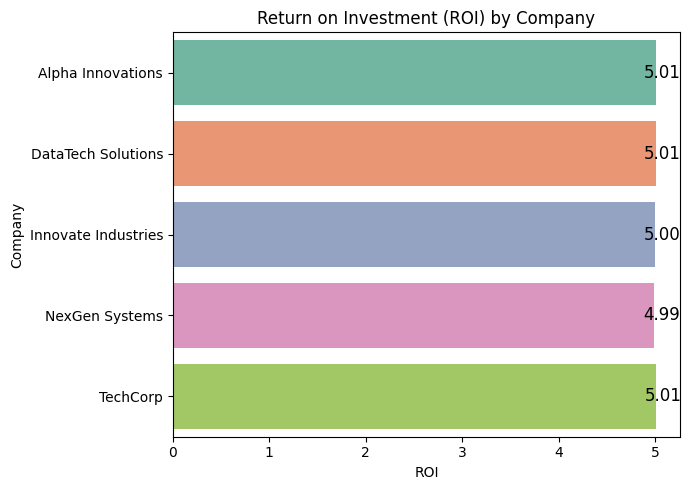

In [ ]:
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='ROI', y='Company', data=company_agg, palette='Set2')

# Adding values to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')

# Customizing the plot
plt.title('Return on Investment (ROI) by Company')
plt.xlabel('ROI')
plt.ylabel('Company')
plt.tight_layout()

<ipython-input-40-98c58a24ec76>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='ROI', y='Channel_Used', data=channelUsed_agg, palette='Set1')


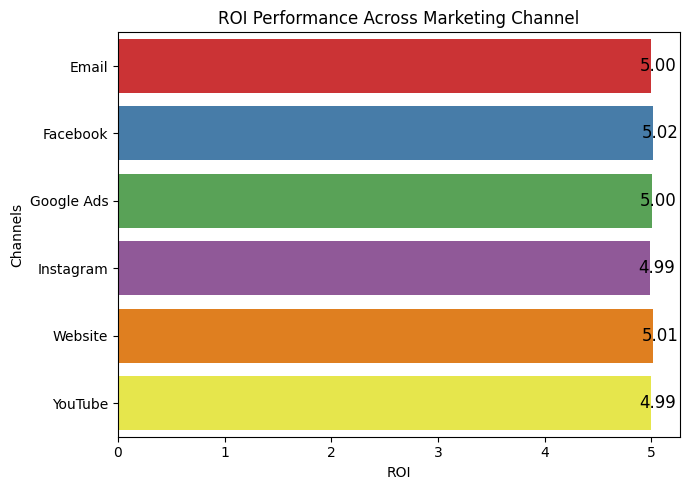

In [ ]:
channelUsed_agg = data.groupby(['Channel_Used'])[['CTR', 'CPC', 'Conversion_Rate', 'ROI']].mean()
# Plotting CTR with values
plt.figure(figsize=(7, 5))
ax = sns.barplot(x='ROI', y='Channel_Used', data=channelUsed_agg, palette='Set1')
#adding the values to the chart
for p in ax.patches:
    ax.annotate(f'{p.get_width():.2f}',
                (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(5, 0), textcoords='offset points')
plt.title('ROI Performance Across Marketing Channel')
plt.xlabel('ROI')
plt.ylabel('Channels')
plt.tight_layout()
plt.show()


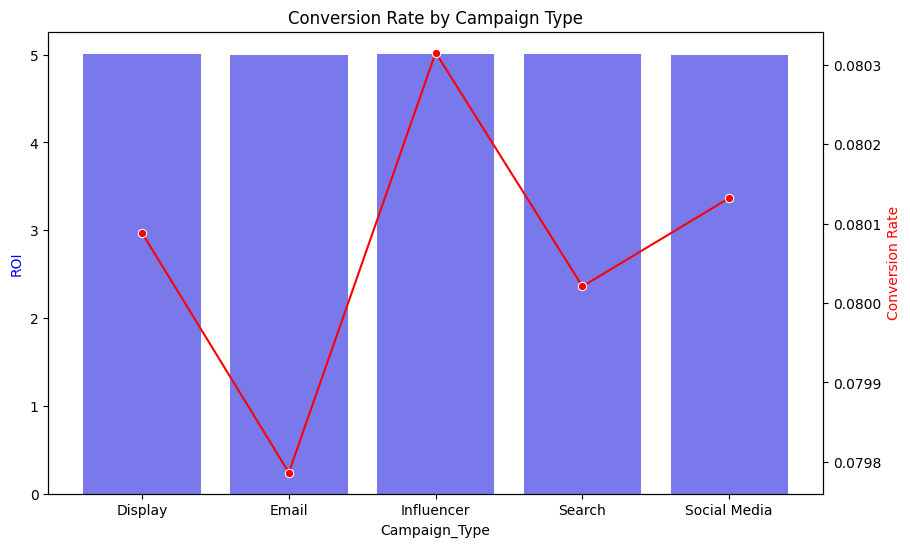

In [ ]:
# Group by Campaign Type and calculate mean ROI and Conversion Rate
campaign_performance = data.groupby("Campaign_Type").agg({
    "ROI": "mean",
    "Conversion_Rate": "mean"
}).reset_index()
# Visualization: Bar Chart for ROI and Conversion Rate by Campaign Type
fig, ax1 = plt.subplots(figsize=(10,6))
# Bar chart for ROI
sns.barplot(x="Campaign_Type", y="ROI", data=campaign_performance, color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("ROI", color="blue")
ax1.set_title("Conversion Rate by Campaign Type")
# Line chart for Conversion Rate on secondary axis
ax2 = ax1.twinx()
sns.lineplot(x="Campaign_Type", y="Conversion_Rate", data=campaign_performance, color="red", marker="o", ax=ax2)
ax2.set_ylabel("Conversion Rate", color="red")
plt.show()
plt.show()

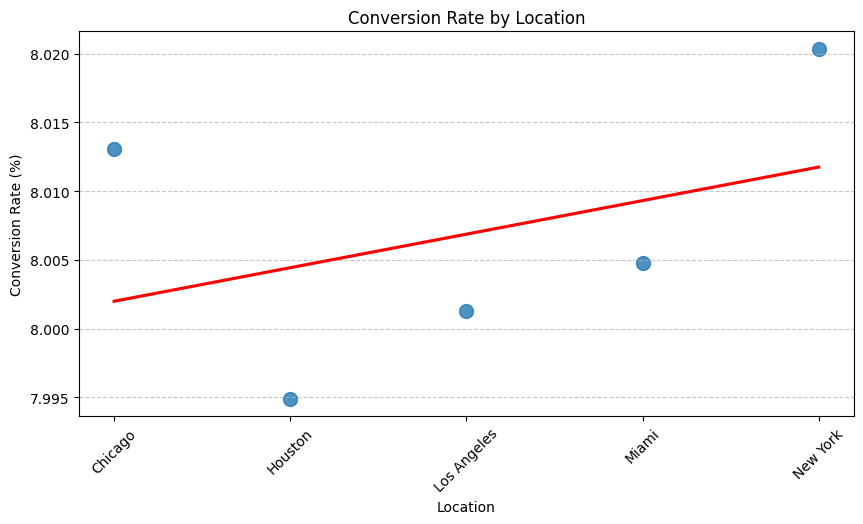

In [ ]:
# Ensure Conversion_Rate is numeric
data["Conversion_Rate"] = pd.to_numeric(data["Conversion_Rate"], errors="coerce")
# Convert to percentage for better visualization
data["Conversion_Rate"] *= 100
# Group by Location and calculate mean Conversion Rate
location_performance = data.groupby("Location", as_index=False)["Conversion_Rate"].mean()
# Sort locations by Conversion Rate
location_performance = location_performance.sort_values(by="Conversion_Rate", ascending=False)
# Scatter Plot with Trend Line (Fixed X-Axis)
plt.figure(figsize=(10,5))
sns.regplot(x=location_performance.index, y="Conversion_Rate", data=location_performance,
            scatter_kws={'s':100}, line_kws={"color":"red"}, ci=None)
# Customize labels
plt.xticks(location_performance.index, location_performance["Location"], rotation=45)
plt.title("Conversion Rate by Location")
plt.xlabel("Location")
plt.ylabel("Conversion Rate (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()